Q-11. Given the data of a feature contributing to different classes https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp =share_ a. Check whether the distribution of all the classes are the same or not. b. Check for the equality of variance/ c. Which amount LDA and QDA would perform better on this data for classification and why. d. Check the equality of mean for between all the classes.

In [3]:
#a) Check whether the distribution of all the classes are the same or not.

import pandas as pd
df=pd.read_excel('C://Users//A146363//Desktop//My_Folder//Zomato_delivery_time_prediction//data.xlsx')
df.head()

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140


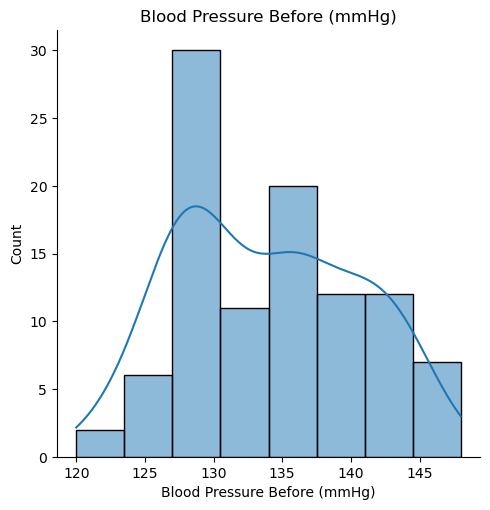

In [6]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.displot(x=df['Blood Pressure Before (mmHg)'], data=df,kde=True)
plt.title('Blood Pressure Before (mmHg)')
plt.show()

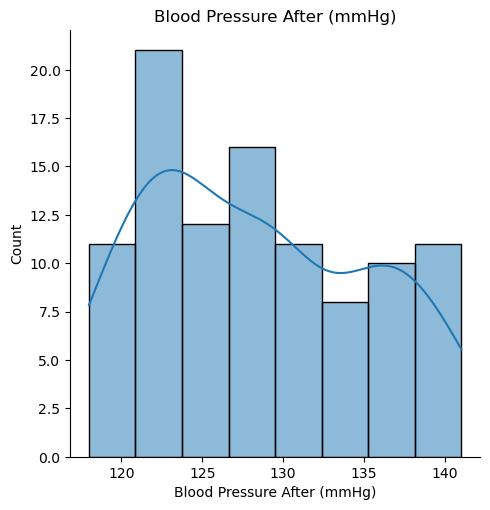

In [7]:
sns.displot(x=df['Blood Pressure After (mmHg)'], data=df,kde=True)
plt.title('Blood Pressure After (mmHg)')
plt.show()

In [10]:
from scipy import stats

import numpy as np

k2, p_value = stats.normaltest(df['Blood Pressure Before (mmHg)'])

if p_value > 0.05:
    print("Blood Pressure Before (mmHg) is likely to follow a normal distribution.")
else:
    print(" Blood Pressure Before (mmHg) is unlikely to follow a normal distribution.")

 Blood Pressure Before (mmHg) is unlikely to follow a normal distribution.


In [11]:
import numpy as np

k2, p_value = stats.normaltest(df['Blood Pressure After (mmHg)'])

if p_value > 0.05:
    print("Blood Pressure After (mmHg) is likely to follow a normal distribution.")
else:
    print("Blood Pressure After (mmHg) is unlikely to follow a normal distribution.")

Blood Pressure After (mmHg) is unlikely to follow a normal distribution.


In [12]:
import numpy as np

k2, p_value = stats.normaltest(np.log(df['Blood Pressure Before (mmHg)']))


if p_value > 0.05:
    print("Blood Pressure Before (mmHg) is likely to follow a lognormal distribution.")
else:
    print("Blood Pressure Before (mmHg) is unlikely to follow a lognormal distribution.")


Blood Pressure Before (mmHg) is unlikely to follow a lognormal distribution.


In [13]:
import numpy as np

k2, p_value = stats.normaltest(np.log(df['Blood Pressure After (mmHg)']))

if p_value > 0.05:
    print("Blood Pressure After (mmHg) is likely to follow a lognormal distribution.")
else:
    print("Blood Pressure After (mmHg) is unlikely to follow a lognormal distribution.")

Blood Pressure After (mmHg) is unlikely to follow a lognormal distribution.


So both the feature certainly dont follow normal or lognormal distribution

b) Check for the equality of variance

F-test variance ratio test

In [14]:
import numpy as np
from scipy.stats import f_oneway


#F test

f_value, p_value = f_oneway(df['Blood Pressure Before (mmHg)'], df['Blood Pressure After (mmHg)'])
print("F-value:", f_value)
print("F critical value from table is 8.51")

F-value: 33.85555270599285
F critical value from table is 8.51


For alpha = 0.05, the critical F-value is approximately 4.102.

Since the F-value (33.8555527059928) is greater than 4.102, so we can reject null hypothesis. so variance of two columns are significantly different

c) Which amount LDA and QDA would perform better on this data for
classification and why

d) Check the equality of mean for between all the classes.

In [16]:
import scipy.stats as stats

t_statistic, p_value = stats.ttest_ind(df['Blood Pressure Before (mmHg)'], df['Blood Pressure After (mmHg)'],equal_var=False)


alpha = 0.05

if p_value < alpha:
    print("The means of the two groups are significantly different.")
else:
    print("There is no significant difference between the means of the two groups.")


The means of the two groups are significantly different.
